# <font color = 'blue'>*Loading Necessary Libraries*</font>

In [1]:
import pandas as pd
import functools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import pearsonr

# <font color = 'blue'>*Importing & Processing of Different Datasets*</font>

In [2]:
#Loading first DataFrame
location = pd.read_csv('D:\Getready\DataInsight\locations.csv')

In [3]:
#Dropping two columns that are consistent with the same entry through out the rows
loc = location.drop(['countriesAndTerritories', 'population_year'], axis=1)
loc.head(10)

,location,continent,population
0,Afghanistan,Asia,38928341.0
1,Albania,Europe,2877800.0
2,Algeria,Africa,43851043.0
3,Andorra,Europe,77265.0
4,Angola,Africa,32866268.0
5,Anguilla,North America,15002.0
6,Antigua and Barbuda,North America,97928.0
7,Argentina,South America,45195777.0
8,Armenia,Asia,2963234.0
9,Aruba,North America,106766.0


In [4]:
#Grouping by continent
'''First DataFrame will be dissassembled by continent and later regrouped again for analysis'''
loc1 = loc.groupby(['continent'])
loc1.head(5)

,location,continent,population
0,Afghanistan,Asia,38928341.0
1,Albania,Europe,2877800.0
2,Algeria,Africa,43851043.0
3,Andorra,Europe,77265.0
4,Angola,Africa,32866268.0
5,Anguilla,North America,15002.0
6,Antigua and Barbuda,North America,97928.0
7,Argentina,South America,45195777.0
8,Armenia,Asia,2963234.0
9,Aruba,North America,106766.0


In [5]:
#Assessing the various groups of continent series
for continent, continent_df in loc1:
    print(continent)
    print(continent_df)

Africa
                         location continent   population
2                         Algeria    Africa   43851043.0
4                          Angola    Africa   32866268.0
20                          Benin    Africa   12123198.0
26                       Botswana    Africa    2351625.0
31                   Burkina Faso    Africa   20903278.0
32                        Burundi    Africa   11890781.0
34                       Cameroon    Africa   26545864.0
36                     Cape Verde    Africa     555988.0
39       Central African Republic    Africa    4829764.0
40                           Chad    Africa   16425859.0
44                          Congo    Africa    5518092.0
46                  Cote d'Ivoire    Africa   26378275.0
52   Democratic Republic of Congo    Africa   89561404.0
54                       Djibouti    Africa     988002.0
58                          Egypt    Africa  102334403.0
60              Equatorial Guinea    Africa    1402985.0
61                      

In [6]:
'''Accesing the  First Dataframe by the various contients for later analysis'''
#Africa group
Africa= loc1.get_group('Africa')
Africa.head(5)
len(Africa)

52

In [7]:
#Asia group
Asia = loc1.get_group('Asia')
Asia.head(5)
len(Asia)

45

In [8]:
#Europe group
Europe = loc1.get_group('Europe')
Europe.head(5)
len(Europe)

51

In [9]:
#NorthAmerica group
NorthAmerica = loc1.get_group('North America')
NorthAmerica.head(5)
len(NorthAmerica)

36

In [10]:
#SouthAmerica group
SouthAmerica = loc1.get_group('South America')
SouthAmerica.head(5)
len(SouthAmerica)

13

In [11]:
#Oceania group
Oceania = loc1.get_group('Oceania')
Oceania.head(5)
len(Oceania)

8

In [12]:
'''Dropping Jersey and  Guernsey countries from the Europe continent as their Population column contains NaN values
After that all six continent groups are concatenated or regrouped for analysis as earlier stated'''
#Sorting cleaned DataFrame by population and assigning to r_all_loc
all_loc = pd.concat([Africa, Asia, Europe, NorthAmerica, Oceania, SouthAmerica])
all_loc_asc_pop = all_loc.sort_values(['population'], ascending = True)
all_loc_asc_pop = all_loc_asc_pop.drop([82], axis=0)
all_loc_asc_pop = all_loc_asc_pop.drop([101], axis=0)
r_all_loc = all_loc_asc_pop
r_all_loc

,location,continent,population
87,Vatican,Europe,8.090000e+02
65,Falkland Islands,South America,3.483000e+03
129,Montserrat,North America,4.999000e+03
5,Anguilla,North America,1.500200e+04
24,Bonaire Sint Eustatius and Saba,North America,2.622100e+04
...,...,...,...
145,Pakistan,Asia,2.208923e+08
92,Indonesia,Asia,2.735236e+08
198,United States,North America,3.310026e+08
91,India,Asia,1.380004e+09


In [13]:
'''Second DataFrame is also loaded and Jersey and Guernsey countries are also removed to make merging of first and
second dataframes possible'''
#Loading Second DataFrame, parsing dates and saving to rfdata
fdata = pd.read_csv('D:/Getready/DataInsight/full_data.csv', parse_dates=['date'])
rfdata = fdata.drop([4618], axis=0, inplace = True)
rfdata = fdata.drop([5992], axis=0)
rfdata

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
12088,2020-04-16,Zimbabwe,6,0,23,3
12089,2020-04-17,Zimbabwe,1,0,24,3
12090,2020-04-18,Zimbabwe,0,0,24,3
12091,2020-04-19,Zimbabwe,1,0,25,3


In [14]:
#Analysing the statistical data of the numerical columns of fdata 
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12092 entries, 0 to 12092
Data columns (total 6 columns):
date            12092 non-null datetime64[ns]
location        12092 non-null object
new_cases       12092 non-null int64
new_deaths      12092 non-null int64
total_cases     12092 non-null int64
total_deaths    12092 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 981.3+ KB


In [15]:
'''Rdata DataFrame contains World(the toatal number of cases in the countries combined) as a row and therefore is removed
and assigned to a variable'''
#Removing World and assigning to noworld_totalcase_all_continents
noworld_totalcase_all_continents = rfdata.loc[(fdata['date'] == '2020-04-20') & (fdata['location'] != 'World')]
noworld_totalcase_all_continents

,date,location,new_cases,new_deaths,total_cases,total_deaths
101,2020-04-20,Afghanistan,88,3,996,33
144,2020-04-20,Albania,14,0,562,26
251,2020-04-20,Algeria,94,8,2629,375
289,2020-04-20,Andorra,9,1,713,36
319,2020-04-20,Angola,0,0,24,2
...,...,...,...,...,...,...
11797,2020-04-20,Venezuela,29,0,256,9
11905,2020-04-20,Vietnam,0,0,276,0
12028,2020-04-20,Yemen,0,0,1,0
12061,2020-04-20,Zambia,4,1,61,3


In [16]:
#Merging cleaned Frist and Second Dataframes and assigning to new_all_loc
new_all_loc = pd.merge(noworld_totalcase_all_continents, r_all_loc, how = 'outer', on = 'location')
new_order = [0,1,6,7,2,3,4,5]
new_all_loc = new_all_loc[new_all_loc.columns[new_order]]
#Accessing the the statistical data of the numerical columns of new_all_loc
new_all_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 8 columns):
date            203 non-null datetime64[ns]
location        203 non-null object
continent       203 non-null object
population      203 non-null float64
new_cases       203 non-null int64
new_deaths      203 non-null int64
total_cases     203 non-null int64
total_deaths    203 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 14.3+ KB


# <font color = 'blue'>*QUESTION 1 - Rate of Deaths to Total Cases*</font>

In [17]:
'''In the first question, we want to find out the rate at which people are dying to the total number of cases they have 
recorded. Therefore we use the 'new_all_loc' DataFrame sorted by total cases to get the first 6 countries, one from each
continent, for this inferential statistics.
We will get the rows of these six countries comprising of all the same column headers separately, analyze and then combine
them to answer our question'''

"In the first question, we want to find out the rate at which people are dying to the total number of cases they have \nrecorded. Therefore we use the 'new_all_loc' DataFrame sorted by total cases to get the first 6 countries, one from each\ncontinent, for this inferential statistics.\nWe will get the rows of these six countries comprising of all the same column headers separately, analyze and then combine\nthem to answer our question"

In [18]:
#Sorting the new merged dataframes by total cases
highest_totalcase_all_continents = new_all_loc.loc[(new_all_loc['date'] == '2020-04-20') & (new_all_loc['location'] != 'World')].sort_values(['total_cases'], ascending = False)
highest_totalcase_all_continents.describe()

,population,new_cases,new_deaths,total_cases,total_deaths
count,2.030000e+02,203.000000,203.000000,203.00000,203.000000
mean,3.811576e+07,365.197044,25.344828,11599.35468,810.975369
std,1.448127e+08,1882.830955,140.978965,58859.61032,4029.385931
min,8.090000e+02,0.000000,0.000000,1.00000,0.000000
25%,1.295104e+06,0.000000,0.000000,52.50000,1.000000
50%,7.132530e+06,9.000000,0.000000,427.00000,8.000000
75%,2.711844e+07,101.000000,3.500000,3037.00000,78.000000
max,1.439324e+09,24601.000000,1772.000000,759687.00000,40682.000000


In [19]:
#Accessing the new merged Dataframes sorted by total cases
highest_totalcase_all_continents

,date,location,continent,population,new_cases,new_deaths,total_cases,total_deaths
193,2020-04-20,United States,North America,331002647.0,24601,1772,759687,40682
172,2020-04-20,Spain,Europe,46754783.0,4218,410,195944,20453
94,2020-04-20,Italy,Europe,60461828.0,3047,433,178972,23660
72,2020-04-20,Germany,Europe,83783945.0,1775,110,141672,4404
192,2020-04-20,United Kingdom,Europe,67886004.0,5850,596,120067,16060
...,...,...,...,...,...,...,...,...
28,2020-04-20,British Virgin Islands,North America,30237.0,1,1,4,1
158,2020-04-20,Sao Tome and Principe,Africa,219161.0,0,0,4,0
171,2020-04-20,South Sudan,Africa,11193729.0,0,0,4,0
5,2020-04-20,Anguilla,North America,15002.0,0,0,3,0


In [20]:
#Getting first 50 countries to select one highest total cases recording country from each continent
first_50 = highest_totalcase_all_continents.head(50)
first_50

,date,location,continent,population,new_cases,new_deaths,total_cases,total_deaths
193,2020-04-20,United States,North America,3.310026e+08,24601,1772,759687,40682
172,2020-04-20,Spain,Europe,4.675478e+07,4218,410,195944,20453
94,2020-04-20,Italy,Europe,6.046183e+07,3047,433,178972,23660
72,2020-04-20,Germany,Europe,8.378394e+07,1775,110,141672,4404
192,2020-04-20,United Kingdom,Europe,6.788600e+07,5850,596,120067,16060
67,2020-04-20,France,Europe,6.527351e+07,785,395,112606,19718
187,2020-04-20,Turkey,Asia,8.433907e+07,3977,127,86306,2017
41,2020-04-20,China,Asia,1.439324e+09,14,0,83817,4636
89,2020-04-20,Iran,Asia,8.399295e+07,1343,87,82211,5118
152,2020-04-20,Russia,Europe,1.459345e+08,6060,48,42853,361


In [21]:
'''From the Dataframe above, the following countries will used for the analysis to answer Question1
Africa = South Africa
Asia = Turkey
Europe = Spain
North America = US
Oceania = Austrialia
South America = Brazil
Death to Total cases columns were added to each countries Dataframe'''

'From the Dataframe above, the following countries will used for the analysis to answer Question1\nAfrica = South Africa\nAsia = Turkey\nEurope = Spain\nNorth America = US\nOceania = Austrialia\nSouth America = Brazil\nDeath to Total cases columns were added to each countries Dataframe'

In [22]:
#Accessing US DataFrame, rearranging columns and adding rate column
US = fdata.loc[fdata['location'] == 'United States']
US.columns = ['date', 'location', 'US_new_cases', 'US_new_deaths', 'US_total_cases', 'US_total_deaths']
pd.options.mode.chained_assignment = None
US['US_death_to_cases']=US['US_total_deaths']/US['US_total_cases']
US.tail()

,date,location,US_new_cases,US_new_deaths,US_total_cases,US_total_deaths,US_death_to_cases
11619,2020-04-16,United States,30148,4928,639664,30985,0.048439
11620,2020-04-17,United States,31667,2299,671331,33284,0.049579
11621,2020-04-18,United States,30833,3770,702164,37054,0.052771
11622,2020-04-19,United States,32922,1856,735086,38910,0.052933
11623,2020-04-20,United States,24601,1772,759687,40682,0.053551


In [23]:
#Accessing Spain DataFrame, rearranging columns and adding rate column
Spain = fdata.loc[fdata['location'] == 'Spain']
Spain.columns = ['date', 'location', 'S_new_cases', 'S_new_deaths', 'S_total_cases', 'S_total_deaths']
Spain['S_death_to_cases']=Spain['S_total_deaths']/Spain['S_total_cases']
Spain.tail()

,date,location,S_new_cases,S_new_deaths,S_total_cases,S_total_deaths,S_death_to_cases
10293,2020-04-16,Spain,5092,523,177633,18579,0.104592
10294,2020-04-17,Spain,5183,551,182816,19130,0.104641
10295,2020-04-18,Spain,5252,348,188068,19478,0.103569
10296,2020-04-19,Spain,3658,565,191726,20043,0.104540
10297,2020-04-20,Spain,4218,410,195944,20453,0.104382


In [24]:
#Accessing Turkey DataFrame, rearranging columns and adding rate column
Turkey = fdata.loc[fdata['location'] == 'Turkey']
Turkey.columns = ['date', 'location', 'T_new_cases', 'T_new_deaths', 'T_total_cases', 'T_total_deaths']
Turkey['T_death_to_cases']=Turkey['T_total_deaths']/Turkey['T_total_cases']
Turkey.tail()

,date,location,T_new_cases,T_new_deaths,T_total_cases,T_total_deaths,T_death_to_cases
11194,2020-04-16,Turkey,4281,115,69392,1518,0.021876
11195,2020-04-17,Turkey,4801,125,74193,1643,0.022145
11196,2020-04-18,Turkey,4353,126,78546,1769,0.022522
11197,2020-04-19,Turkey,3783,121,82329,1890,0.022957
11198,2020-04-20,Turkey,3977,127,86306,2017,0.023370


In [25]:
#Accessing Brazil DataFrame, rearranging columns and adding rate column
Brazil = fdata.loc[fdata['location'] == 'Brazil']
Brazil.columns = ['date', 'location', 'B_new_cases', 'B_new_deaths', 'B_total_cases', 'B_total_deaths']
Brazil['B_death_to_cases']=Brazil['B_total_deaths']/Brazil['B_total_cases']
Brazil.tail()

,date,location,B_new_cases,B_new_deaths,B_total_cases,B_total_deaths,B_death_to_cases
1672,2020-04-16,Brazil,3058,204,28320,1736,0.061299
1673,2020-04-17,Brazil,2105,188,30425,1924,0.063237
1674,2020-04-18,Brazil,3257,217,33682,2141,0.063565
1675,2020-04-19,Brazil,2917,206,36599,2347,0.064127
1676,2020-04-20,Brazil,2055,115,38654,2462,0.063693


In [26]:
#Accessing Australia DataFrame, rearranging columns and adding rate column
Australia = fdata.loc[fdata['location'] == 'Australia']
Australia.columns = ['date', 'location', 'A_new_cases', 'A_new_deaths', 'A_total_cases', 'A_total_deaths']
Australia['A_death_to_cases']=Australia['A_total_deaths']/Australia['A_total_cases']
Australia.tail()

,date,location,A_new_cases,A_new_deaths,A_total_cases,A_total_deaths,A_death_to_cases
661,2020-04-16,Australia,42,2,6458,63,0.009755
662,2020-04-17,Australia,39,0,6497,63,0.009697
663,2020-04-18,Australia,36,4,6533,67,0.010256
664,2020-04-19,Australia,53,2,6586,69,0.010477
665,2020-04-20,Australia,26,1,6612,70,0.010587


In [27]:
#Accessing South Africa DataFrame, rearranging columns and adding rate column
South_Africa = fdata.loc[fdata['location'] == 'South Africa']
South_Africa.columns = ['date', 'location', 'SA_new_cases', 'SA_new_deaths', 'SA_total_cases', 'SA_total_deaths']
South_Africa['SA_death_to_cases']=South_Africa['SA_total_deaths']/South_Africa['SA_total_cases']
South_Africa.tail()

,date,location,SA_new_cases,SA_new_deaths,SA_total_cases,SA_total_deaths,SA_death_to_cases
10054,2020-04-16,South Africa,91,7,2506,34,0.013567
10055,2020-04-17,South Africa,99,14,2605,48,0.018426
10056,2020-04-18,South Africa,178,2,2783,50,0.017966
10057,2020-04-19,South Africa,251,2,3034,52,0.017139
10058,2020-04-20,South Africa,124,2,3158,54,0.017099


In [28]:
#Merging all Dataframes from the six countries and dropping some columns
d_t = [US,Spain,Turkey,Brazil,Australia,South_Africa]
d_t_final = functools.reduce(lambda left,right: pd.merge(left,right,on='date', how='outer'), d_t)
d_t_final = d_t_final.drop(['location_x','US_new_cases','US_new_deaths','US_total_cases','US_total_deaths'], axis =1)
d_t_final = d_t_final.drop(['location_y','S_new_cases','S_new_deaths','S_total_cases','S_total_deaths'], axis =1)
d_t_final = d_t_final.drop(['T_new_cases','T_new_deaths','T_total_cases','T_total_deaths'], axis =1)
d_t_final = d_t_final.drop(['B_new_cases','B_new_deaths','B_total_cases','B_total_deaths'], axis =1)
d_t_final = d_t_final.drop(['A_new_cases','A_new_deaths','A_total_cases','A_total_deaths'], axis =1)
d_t_final = d_t_final.drop(['SA_new_cases','SA_new_deaths','SA_total_cases','SA_total_deaths'], axis =1)
d_t_final

,date,US_death_to_cases,S_death_to_cases,T_death_to_cases,B_death_to_cases,A_death_to_cases,SA_death_to_cases
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
107,2020-04-16,0.048439,0.104592,0.021876,0.061299,0.009755,0.013567
108,2020-04-17,0.049579,0.104641,0.022145,0.063237,0.009697,0.018426
109,2020-04-18,0.052771,0.103569,0.022522,0.063565,0.010256,0.017966
110,2020-04-19,0.052933,0.104540,0.022957,0.064127,0.010477,0.017139


In [29]:
#Filling NaN values with 0, explanation will be provided in the blog
d_t_final['US_death_to_cases'].fillna(0, inplace =True)
d_t_final['S_death_to_cases'].fillna(0, inplace =True)
d_t_final['T_death_to_cases'].fillna(0, inplace =True)
d_t_final['B_death_to_cases'].fillna(0, inplace =True)
d_t_final['A_death_to_cases'].fillna(0, inplace =True)
d_t_final['SA_death_to_cases'].fillna(0, inplace =True)
d_t_final

,date,US_death_to_cases,S_death_to_cases,T_death_to_cases,B_death_to_cases,A_death_to_cases,SA_death_to_cases
0,2019-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
107,2020-04-16,0.048439,0.104592,0.021876,0.061299,0.009755,0.013567
108,2020-04-17,0.049579,0.104641,0.022145,0.063237,0.009697,0.018426
109,2020-04-18,0.052771,0.103569,0.022522,0.063565,0.010256,0.017966
110,2020-04-19,0.052933,0.104540,0.022957,0.064127,0.010477,0.017139


C:\Users\Andy Oduro\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


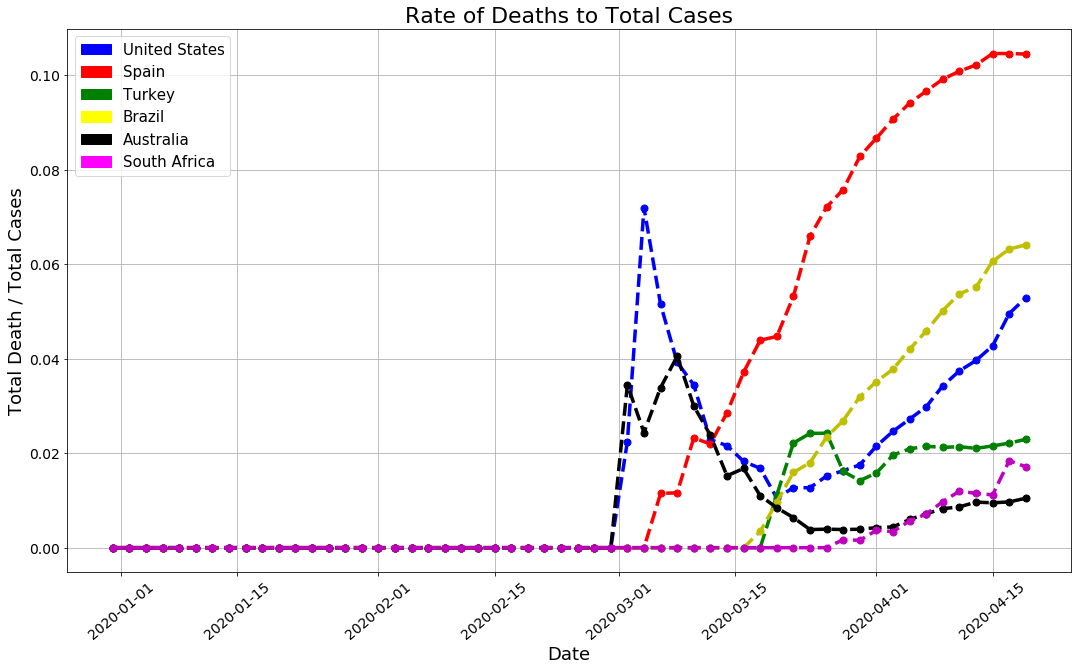

In [30]:
#Visualing Rate of death to total cases to answer Question1
plt.figure(figsize=(18,10))
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'US_death_to_cases'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'S_death_to_cases'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'T_death_to_cases'], color = 'g',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'B_death_to_cases'], color = 'y',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'A_death_to_cases'], color = 'k',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.plot(d_t_final.loc[::2, 'date'], d_t_final.loc[::2, 'SA_death_to_cases'], color = 'm',marker='o', 
         linestyle='dashed', linewidth=3.5, markersize=7)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=40, fontsize = 14)
plt.ylabel('Total Death / Total Cases', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Rate of Deaths to Total Cases', fontsize=22)
blue = patches.Patch(color='blue', label='United States')
red = patches.Patch(color='red', label='Spain')
green = patches.Patch(color='green', label='Turkey')
yellow = patches.Patch(color='yellow', label='Brazil')
black = patches.Patch(color='black', label='Australia')
magenta = patches.Patch(color='magenta', label='South Africa')
plt.legend(handles=[blue, red, green, yellow, black, magenta], prop={'size':15})
plt.grid()

# <font color = 'blue'>*QUESTION 2 - Contribution of Population Size to Infection Rate*</font>

In [31]:
#Taking first 49, middle 49 and last 49 countries sorting by population size
#Taking first 49, middle 49 and last 49 countries sorting by population size
#Also, I addded a new column to each dataframe to aid with the scatter plotting which will be shown below
population_all_continents = new_all_loc.loc[(new_all_loc['date'] == '2020-04-20') & (new_all_loc['location'] != 'World')].sort_values(['population'], ascending = False)
first_49 = population_all_continents.head(49)
first_49['scatter_size'] = 120
pop = population_all_continents.reset_index().drop(['index'], axis = 1)
middle_49 = pop[77:126]
middle_49['scatter_size'] = 50
population_all_continents = new_all_loc.loc[(new_all_loc['date'] == '2020-04-20') & (new_all_loc['location'] != 'World')].sort_values(['population'], ascending = True)
last_49 = population_all_continents.head(49)
last_49['scatter_size'] = 15
first_49

,date,location,continent,population,new_cases,new_deaths,total_cases,total_deaths,scatter_size
41,2020-04-20,China,Asia,1.439324e+09,14,0,83817,4636,120
87,2020-04-20,India,Asia,1.380004e+09,1553,36,17265,543,120
193,2020-04-20,United States,North America,3.310026e+08,24601,1772,759687,40682,120
88,2020-04-20,Indonesia,Asia,2.735236e+08,327,47,6575,582,120
140,2020-04-20,Pakistan,Asia,2.208923e+08,425,17,8418,176,120
27,2020-04-20,Brazil,South America,2.125594e+08,2055,115,38654,2462,120
136,2020-04-20,Nigeria,Africa,2.061396e+08,85,2,627,21,120
15,2020-04-20,Bangladesh,Asia,1.646894e+08,312,7,2456,91,120
152,2020-04-20,Russia,Europe,1.459345e+08,6060,48,42853,361,120
120,2020-04-20,Mexico,North America,1.289328e+08,764,36,8261,686,120


In [32]:
#concatenating first_49 =, middle_49, last_49 DataFrames
first_mid_last = pd.concat([first_49,middle_49,last_49])
first_mid_last = first_mid_last.sort_values(['population'], ascending = False).reset_index().drop(['index'], axis=1)
first_mid_last[60:79]

,date,location,continent,population,new_cases,new_deaths,total_cases,total_deaths,scatter_size
60,2020-04-20,Azerbaijan,Asia,10139175.0,25,1,1398,19,50
61,2020-04-20,Sweden,Europe,10099270.0,563,29,14385,1540,50
62,2020-04-20,Honduras,North America,9904608.0,5,0,477,46,50
63,2020-04-20,United Arab Emirates,Asia,9890400.0,479,4,6781,41,50
64,2020-04-20,Hungary,Europe,9660350.0,68,10,1984,199,50
65,2020-04-20,Belarus,Europe,9449321.0,0,2,4779,47,50
66,2020-04-20,Austria,Europe,9006400.0,48,9,14710,452,50
67,2020-04-20,Papua New Guinea,Oceania,8947027.0,0,0,7,0,50
68,2020-04-20,Israel,Asia,8655541.0,226,8,13491,172,50
69,2020-04-20,Switzerland,Europe,8654618.0,336,24,27658,1134,50


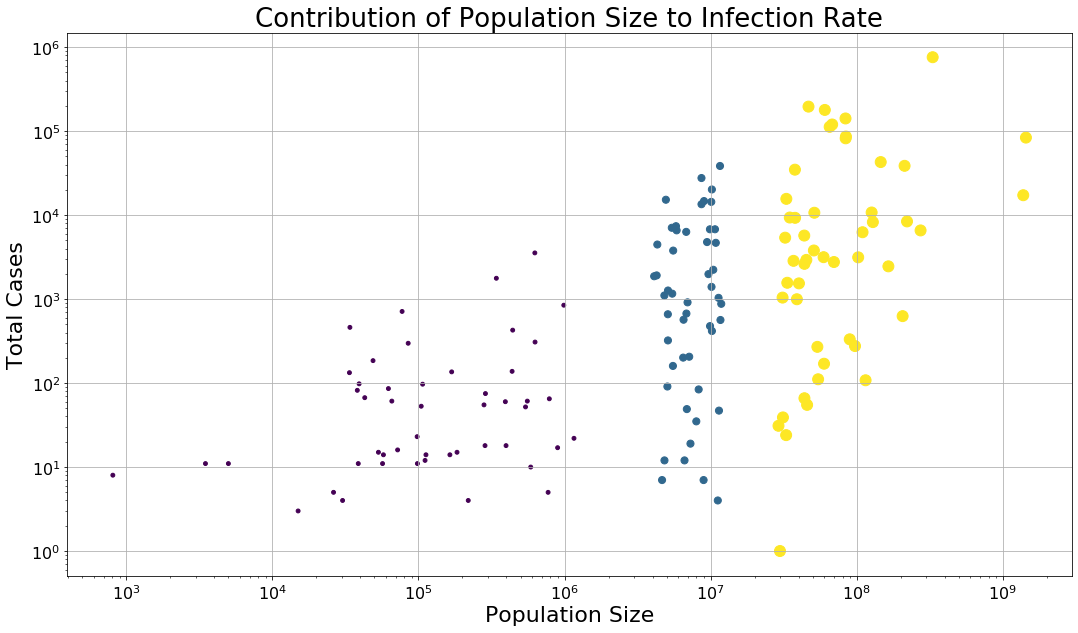

In [33]:
plt.figure(figsize=(18,10))
log = plt.gca()
plt.scatter(first_mid_last['population'], first_mid_last['total_cases'], s = first_mid_last['scatter_size'],
            c = first_mid_last['scatter_size'])
plt.title('Contribution of Population Size to Infection Rate', fontsize=26)
log.set_xscale('log')
plt.xlabel('Population Size', fontsize=22)
plt.xticks(fontsize = 16)
log.set_yscale('log')
plt.ylabel('Total Cases', fontsize=22)
plt.yticks(fontsize = 16)
plt.grid()

In [34]:
#Manually calculating correlation coefficient to very thesis
corr, _ = pearsonr(first_mid_last['population'], first_mid_last['total_cases'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.222


# <font color = 'blue'>*QUESTION 3 - Distribution of Total Deaths*</font>

In [35]:
#Sorting new_all_loc DataFrame on Total_Deaths
highest_deathcase_all_continents = new_all_loc.loc[(new_all_loc['date'] == '2020-04-20') & (new_all_loc['location'] != 'World')].sort_values(['total_deaths'], ascending = False)
highest_deathcase_all_continents

,date,location,continent,population,new_cases,new_deaths,total_cases,total_deaths
193,2020-04-20,United States,North America,331002647.0,24601,1772,759687,40682
94,2020-04-20,Italy,Europe,60461828.0,3047,433,178972,23660
172,2020-04-20,Spain,Europe,46754783.0,4218,410,195944,20453
67,2020-04-20,France,Europe,65273512.0,785,395,112606,19718
192,2020-04-20,United Kingdom,Europe,67886004.0,5850,596,120067,16060
...,...,...,...,...,...,...,...,...
65,2020-04-20,Fiji,Oceania,896444.0,0,0,17,0
68,2020-04-20,French Polynesia,Oceania,280904.0,0,0,55,0
24,2020-04-20,Bonaire Sint Eustatius and Saba,North America,26221.0,1,0,5,0
143,2020-04-20,Papua New Guinea,Oceania,8947027.0,0,0,7,0


In [36]:
#Statiscal data for numerical columns including Total_Deaths
highest_deathcase_all_continents.describe()

,population,new_cases,new_deaths,total_cases,total_deaths
count,2.030000e+02,203.000000,203.000000,203.00000,203.000000
mean,3.811576e+07,365.197044,25.344828,11599.35468,810.975369
std,1.448127e+08,1882.830955,140.978965,58859.61032,4029.385931
min,8.090000e+02,0.000000,0.000000,1.00000,0.000000
25%,1.295104e+06,0.000000,0.000000,52.50000,1.000000
50%,7.132530e+06,9.000000,0.000000,427.00000,8.000000
75%,2.711844e+07,101.000000,3.500000,3037.00000,78.000000
max,1.439324e+09,24601.000000,1772.000000,759687.00000,40682.000000


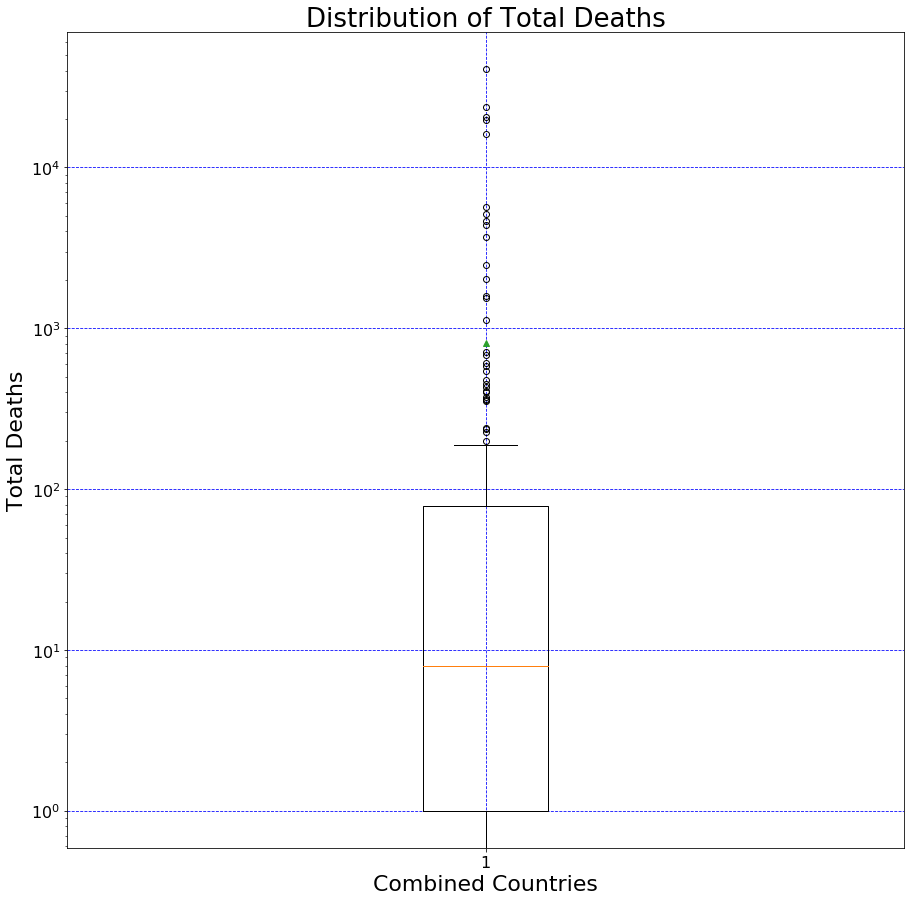

In [37]:
# Import highest_deathcase_all_continents DataFrame and visualize it
plt.figure(figsize=(15,15))
plt.boxplot(highest_deathcase_all_continents['total_deaths'], showmeans=True)
plt.title('Distribution of Total Deaths', fontsize=26)
log = plt.gca()
log.set_yscale('log')
plt.xlabel('Combined Countries', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Total Deaths', fontsize=22)
plt.yticks(fontsize = 16)
plt.grid(color='b', linestyle='--')